<a href="https://colab.research.google.com/github/IliasSuvanov/DSforEconomists/blob/master/Seminar16/Seminar16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar 16
## Plan
- Mergin Datasets
- Hierarchical Indexing

### Merging Datasets
**pandas.merge** connects rows in DataFrames based on one or more keys. This
will be familiar to users of SQL or other relational databases, as it implements
database join operations.

In [ ]:
import pandas as pd

In [ ]:
grd1 = pd.DataFrame([['Alex', 'A+'],
              ['Amanda', 'B+'],
              ['Jonathan', 'D'],
              ['Mike','B']], columns=['name', 'math'])

In [ ]:
grd1.head()

,name,math
0,Alex,A+
1,Amanda,B+
2,Jonathan,D
3,Mike,B


In [ ]:
grd2 = pd.DataFrame([['Alex', 'D+'],
              ['Amanda', 'B+'],
              ['Jonathan', 'A'],
              ['Mike','B']], columns=['name', 'english'])

In [ ]:
grd2.head()

,name,english
0,Alex,D+
1,Amanda,B+
2,Jonathan,A
3,Mike,B


In [ ]:
pd.merge(grd1, grd2)

,name,math,english
0,Alex,A+,D+
1,Amanda,B+,B+
2,Jonathan,D,A
3,Mike,B,B


In [ ]:
df1 = pd.DataFrame([['osh','banana', 10],
                    ['orto-sai','banana', 15],
                    ['batken','peach', 25],
                    ['dordoi','watermelon', 60],
                    ['osh','watermelon', 70]], columns = ['bazar location','fruit type', 
                                                    'bought'])

In [ ]:
df1.head()

,bazar location,fruit type,bought
0,osh,banana,10
1,orto-sai,banana,15
2,batken,peach,25
3,dordoi,watermelon,60
4,osh,watermelon,70


In [ ]:
df2 = pd.DataFrame([['banana', 20],
                    ['peach', 30],
                    ['watermelon',50]], columns=['fruit type','sold'] )

In [ ]:
df2.head()

,fruit type,sold
0,banana,20
1,peach,30
2,watermelon,50


In [ ]:
pd.merge(df1,df2)

,bazar location,fruit type,bought,sold
0,osh,banana,10,20
1,orto-sai,banana,15,20
2,batken,peach,25,30
3,dordoi,watermelon,60,50
4,osh,watermelon,70,50


If the information on which columns to merge by is not speci‐
fied, pd.merge uses the overlapping column names as the keys. However it is a good practice to
specify explicitly on which columns to merge by.

In [ ]:
pd.merge(df1, df2, on='fruit type')

,bazar location,fruit type,bought,sold
0,osh,banana,10,20
1,orto-sai,banana,15,20
2,batken,peach,25,30
3,dordoi,watermelon,60,50
4,osh,watermelon,70,50


If the column names are different in each object, you can specify them separately key column in the first dataframe and key column on the second dataframe.

In [ ]:
df3 = pd.DataFrame([['osh','banana', 10],
                    ['orto-sai','banana', 15],
                    ['batken','peach', 25],
                    ['dordoi','watermelon', 60],
                    ['osh','watermelon', 70]], columns = ['bazar location','fruits', 
                                                    'bought'])

In [ ]:
df3.head()

,bazar location,fruits,bought
0,osh,banana,10
1,orto-sai,banana,15
2,batken,peach,25
3,dordoi,watermelon,60
4,osh,watermelon,70


In [ ]:
df4 = pd.DataFrame([['banana', 20],
                    ['peach', 30],
                    ['watermelon',50]], columns=['fruit type','sold total'] )

In [ ]:
df4.head()

,fruit type,sold
0,banana,20
1,peach,30
2,watermelon,50


In [ ]:
pd.merge(df3,df4)

MergeError: ignored

In [ ]:
pd.merge(df3, df4, left_on='fruits', right_on='fruit type')

,bazar location,fruits,bought,fruit type,sold total
0,osh,banana,10,banana,20
1,orto-sai,banana,15,banana,20
2,batken,peach,25,peach,30
3,dordoi,watermelon,60,watermelon,50
4,osh,watermelon,70,watermelon,50


By default pd.merge will keep only intersection common items in merging columns.

In [ ]:
df5 = pd.DataFrame([['banana', 20],
                    ['peach', 30],
                    ['avacado', 10],
                    ['watermelon',50]], columns=['fruit type','sold'] )

In [ ]:
df1.head()

,bazar location,fruit type,bought
0,osh,banana,10
1,orto-sai,banana,15
2,batken,peach,25
3,dordoi,watermelon,60
4,osh,watermelon,70


In [ ]:
df5.head()

,fruit type,sold
0,banana,20
1,peach,30
2,avacado,10
3,watermelon,50


In [ ]:
pd.merge(df1, df5, on='fruit type')

,bazar location,fruit type,bought,sold
0,osh,banana,10,20
1,orto-sai,banana,15,20
2,batken,peach,25,30
3,dordoi,watermelon,60,50
4,osh,watermelon,70,50


In [ ]:
pd.merge(df1, df5, on ='fruit type', how='outer')

,bazar location,fruit type,bought,sold
0,osh,banana,10.0,20
1,orto-sai,banana,15.0,20
2,batken,peach,25.0,30
3,dordoi,watermelon,60.0,50
4,osh,watermelon,70.0,50
5,NaN,avacado,NaN,10


In [ ]:
grd1 = pd.DataFrame([['Alex', 'A+'],
              ['Amanda', 'B+'],
              ['Jonathan', 'D'],
              ['Mike','B']], columns=['name', 'math'])
grd2 = pd.DataFrame([['Alex', 'D+'],
              ['Pablo', 'B+'],
              ['Eric', 'A'],
              ['Mike','B']], columns=['name', 'english'])

In [ ]:
grd1.head()

,name,math
0,Alex,A+
1,Amanda,B+
2,Jonathan,D
3,Mike,B


In [ ]:
grd2.head()

,name,english
0,Alex,D+
1,Pablo,B+
2,Eric,A
3,Mike,B


In [ ]:
pd.merge(grd1, grd2, on='name', how='outer')

,name,math,english
0,Alex,A+,D+
1,Amanda,B+,NaN
2,Jonathan,D,NaN
3,Mike,B,B
4,Pablo,NaN,B+
5,Eric,NaN,A


In [ ]:
pd.merge(grd1, grd2, on='name', how='left')

,name,math,english
0,Alex,A+,D+
1,Amanda,B+,NaN
2,Jonathan,D,NaN
3,Mike,B,B


In [ ]:
pd.merge(grd1, grd2, on='name', how='right')

,name,math,english
0,Alex,A+,D+
1,Pablo,NaN,B+
2,Eric,NaN,A
3,Mike,B,B


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.dofactory.com/img/sql/sql-joins.png")

In [ ]:
grd1 = pd.DataFrame( [['Romanov','Alex', 'A+'],
                      ['Kubanov','Alex', 'B+'],
                      ['Ivanova','Amanda', 'B+'],
                      ['Petrova', 'Amanda', 'D'],
                      ['Alekseev','Mike','B']], columns=['last name', 'first name', 'math'])

grd2 = pd.DataFrame( [['Romanov','Alex', 'D+'],
                      ['Kubanov','Alex', 'C-'],
                      ['Reznikov','Pablo', 'B+'],
                      ['Vorhaar','Eric', 'A'],
                      ['Alekseev','Mike','B']], columns=['last name', 'first name', 'english'])

In [ ]:
grd1.head()

,last name,first name,math
0,Romanov,Alex,A+
1,Kubanov,Alex,B+
2,Ivanova,Amanda,B+
3,Petrova,Amanda,D
4,Alekseev,Mike,B


In [ ]:
grd2.head()

,last name,first name,english
0,Romanov,Alex,D+
1,Kubanov,Alex,C-
2,Reznikov,Pablo,B+
3,Vorhaar,Eric,A
4,Alekseev,Mike,B


In [ ]:
pd.merge(grd1, grd2, on='first name', how='outer')

,last name_x,first name,math,last name_y,english
0,Romanov,Alex,A+,Romanov,D+
1,Romanov,Alex,A+,Kubanov,C-
2,Kubanov,Alex,B+,Romanov,D+
3,Kubanov,Alex,B+,Kubanov,C-
4,Ivanova,Amanda,B+,NaN,NaN
5,Petrova,Amanda,D,NaN,NaN
6,Alekseev,Mike,B,Alekseev,B
7,NaN,Pablo,NaN,Reznikov,B+
8,NaN,Eric,NaN,Vorhaar,A


In [ ]:
pd.merge(grd1, grd2, on=['last name','first name'], how='outer')

,last name,first name,math,english
0,Romanov,Alex,A+,D+
1,Kubanov,Alex,B+,C-
2,Ivanova,Amanda,B+,NaN
3,Petrova,Amanda,D,NaN
4,Alekseev,Mike,B,B
5,Reznikov,Pablo,NaN,B+
6,Vorhaar,Eric,NaN,A


In [ ]:
df_hh1a = pd.read_stata('hh1a.dta')

In [ ]:
df_hh1a.head()

,hhid,pid,h102,h103m,h103y,h103a,h104,h105,h108,h108a,h109,h110
0,2001,1,male,11,1973,43,head,kyrgyz,married,2.0,yes,NaN
1,2001,2,female,4,1973,43,spouse/ partner,kyrgyz,married,1.0,yes,NaN
2,2001,3,female,7,1997,19,son/ daughter,kyrgyz,single,NaN,yes,NaN
3,2001,4,male,2,2002,14,son/ daughter,kyrgyz,NaN,NaN,yes,NaN
4,2001,5,male,11,2006,10,son/ daughter,kyrgyz,NaN,NaN,yes,NaN


In [ ]:
df_id1 = pd.read_stata('id1.dta')

In [ ]:
df_id1.head()

,hhid,pid,i100,i101_1,i101_2,i101_3,i101_4,i101_6,i101_7,i101_8,i101_9,i101_10,i103,i102,i104,i106,i107
0,2001,1,9,8,10 (completely satisfied),9,9,9,10 (completely satisfied),9,10 (completely satisfied),9,Some increase,No change,Some increase,7,9
1,2001,2,9,9,4,6,4,9,9,9,9,8,No change,Some increase,Some increase,7,8
2,2001,3,8,8,2,6,3,8,not applicable,7,8,7,No change,No change,Some increase,7,completely willing to take risks
3,2002,1,6,6,6,6,6,6,5,6,6,5,Some increase,Some increase,No change,6,2
4,2003,1,8,7,8,8,8,8,8,8,8,8,No change,Some increase,Some increase,8,5


In [ ]:
df_main = pd.merge(df_hh1a, df_id1, on=['hhid','pid'], how='outer')

In [ ]:
df_main.head()

,hhid,pid,h102,h103m,h103y,h103a,h104,h105,h108,h108a,h109,h110,i100,i101_1,i101_2,i101_3,i101_4,i101_6,i101_7,i101_8,i101_9,i101_10,i103,i102,i104,i106,i107
0,2001,1,male,11,1973,43,head,kyrgyz,married,2.0,yes,NaN,9,8,10 (completely satisfied),9,9,9,10 (completely satisfied),9,10 (completely satisfied),9,Some increase,No change,Some increase,7,9
1,2001,2,female,4,1973,43,spouse/ partner,kyrgyz,married,1.0,yes,NaN,9,9,4,6,4,9,9,9,9,8,No change,Some increase,Some increase,7,8
2,2001,3,female,7,1997,19,son/ daughter,kyrgyz,single,NaN,yes,NaN,8,8,2,6,3,8,not applicable,7,8,7,No change,No change,Some increase,7,completely willing to take risks
3,2001,4,male,2,2002,14,son/ daughter,kyrgyz,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,5,male,11,2006,10,son/ daughter,kyrgyz,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_main.dtypes

hhid          int16
pid            int8
h102       category
h103m          int8
h103y         int16
h103a          int8
h104       category
h105       category
h108       category
h108a       float64
h109       category
h110       category
i100       category
i101_1     category
i101_2     category
i101_3     category
i101_4     category
i101_6     category
i101_7     category
i101_8     category
i101_9     category
i101_10    category
i103       category
i102       category
i104       category
i106       category
i107       category
dtype: object

In [ ]:
df_main = df_main.dropna(subset=['i100'])

In [ ]:
df_main['i100']

0        9
1        9
2        8
6        6
7        8
        ..
13275    7
13278    6
13279    6
13282    8
13283    7
Name: i100, Length: 8031, dtype: category
Categories (11, object): ['0 (completely dissatisfied)' < 1 < 2 < 3 ... 7 < 8 < 9 < '10 (completely satisfied)']

In [ ]:
df_main['i100'] = df_main['i100'].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


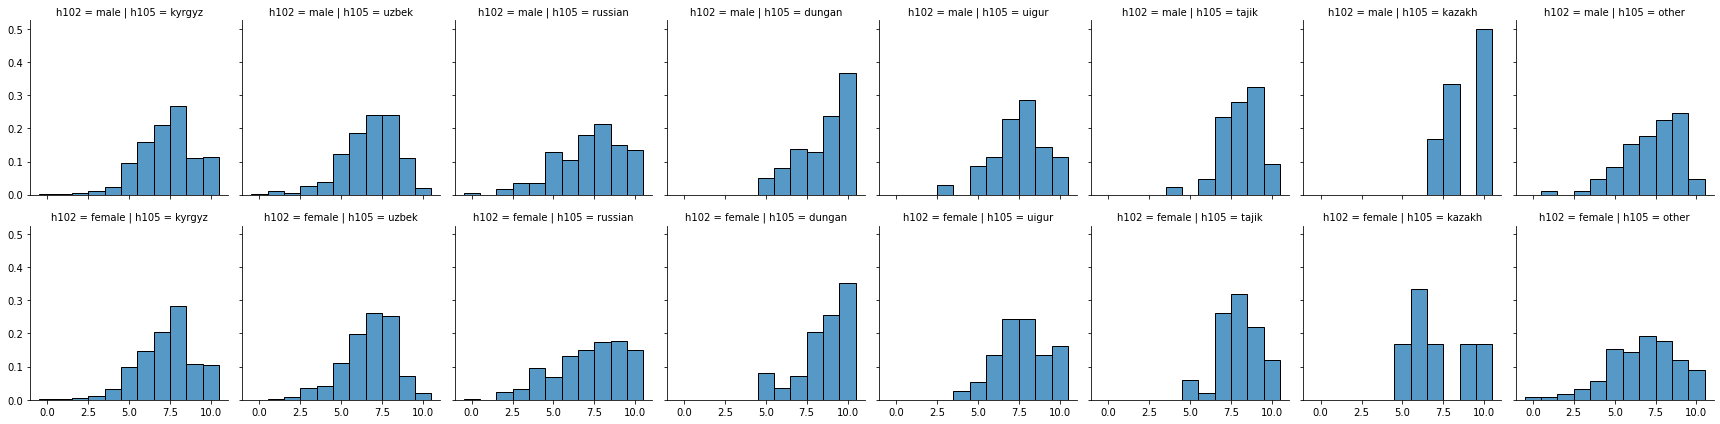

In [ ]:
import seaborn as sns 
g = sns.FacetGrid(df_main, col="h105",  row="h102")
g.map_dataframe(sns.histplot, x="i100", stat="probability", discrete=True)

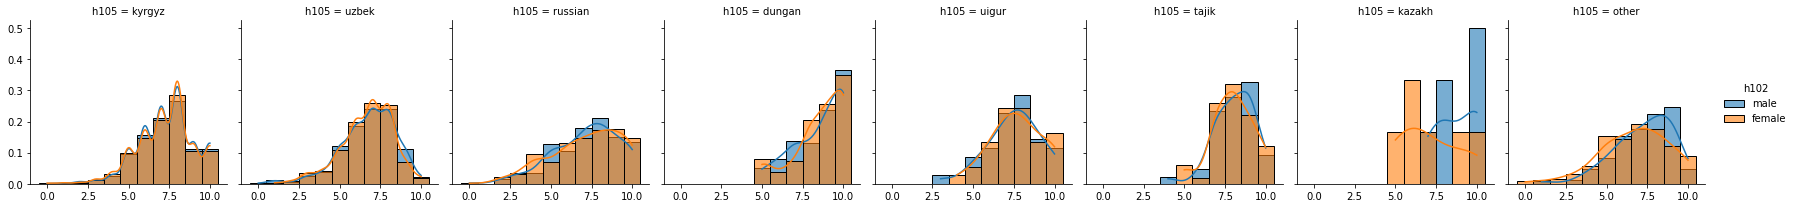

In [ ]:
import seaborn as sns 
g = sns.FacetGrid(df_main, col="h105", hue ='h102')
g.map_dataframe(sns.histplot, x="i100", stat="probability", discrete=True, kde=True, alpha=0.6)
g.add_legend()

## Hierarchical indexing
***Hierarchical indexing*** is an important feature of pandas that enables you to have multiple (two or more) index levels on an axis. Somewhat abstractly, it provides a way for
you to work with higher dimensional data in a lower dimensional form. Let’s start
with a simple example; create a Series with a list of lists (or arrays) as the index:

In [ ]:
import numpy as np
import pandas as pd
data = pd.DataFrame(np.random.choice(['A','B','C','D'],9), 
                 index=[['Eco', 'Eco', 'Eco', 'Anth', 'Anth', 'Apl math', 'Apl math', 'SWE', 'SWE'], 
                        ['Mike', 'Alex', 'Christopher', 'Jessica', 'Patricia', 'Pablo', 'Eglesias', 'Alfred', 'Mike']], columns=['Grades'])

In [ ]:
data.head(10)

Grades
Eco      Mike             B
         Alex             A
         Christopher      B
Anth     Jessica          B
         Patricia         A
Apl math Pablo            C
         Eglesias         A
SWE      Alfred           A
         Mike             A

In [ ]:
data.index

MultiIndex([(     'Eco',        'Mike'),
            (     'Eco',        'Alex'),
            (     'Eco', 'Christopher'),
            (    'Anth',     'Jessica'),
            (    'Anth',    'Patricia'),
            ('Apl math',       'Pablo'),
            ('Apl math',    'Eglesias'),
            (     'SWE',      'Alfred'),
            (     'SWE',        'Mike')],
           )

In [ ]:
data.loc['Eco']

,Grades
Mike,B
Alex,A
Christopher,B


In [ ]:
data.loc[['Eco','Anth']]

Grades
Eco  Mike             B
     Alex             A
     Christopher      B
Anth Jessica          B
     Patricia         A

In [ ]:
data

Grades
Eco      Mike             B
         Alex             A
         Christopher      B
Anth     Jessica          B
         Patricia         A
Apl math Pablo            C
         Eglesias         A
SWE      Alfred           A
         Mike             A

In [ ]:
data.unstack()

Grades                                                        
           Alex Alfred Christopher Eglesias Jessica Mike Pablo Patricia
Anth        NaN    NaN         NaN      NaN       B  NaN   NaN        A
Apl math    NaN    NaN         NaN        A     NaN  NaN     C      NaN
Eco           A    NaN           B      NaN     NaN    B   NaN      NaN
SWE         NaN      A         NaN      NaN     NaN    A   NaN      NaN

In [ ]:
data.unstack().stack()

Grades
Anth     Jessica          B
         Patricia         A
Apl math Eglesias         A
         Pablo            C
Eco      Alex             A
         Christopher      B
         Mike             B
SWE      Alfred           A
         Mike             A